In [1]:
import os 
print(os.listdir("../data/"))

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pylab as plt
import matplotlib.dates as mdates
plt.rcParams['figure.figsize'] = (15.0, 8.0)
import seaborn as sns

['sales_train.csv', 'shops.csv', 'test.csv', 'item_categories.csv', 'items.csv', 'sample_submission.csv']


In [2]:
# for kaggle competition, always look at sample_submission.csv first, so you know what you want to get
# then train.csv and test.csv
sub = pd.read_csv('../data/sample_submission.csv')
sub.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [3]:
train = pd.read_csv('../data/sales_train.csv')
print ('number of shops: ', train['shop_id'].max())
print ('number of items: ', train['item_id'].max())

num_month = train['date_block_num'].max()
print ('number of month: ', num_month)
print ('size of train: ', train.shape)

train.head()

number of shops:  59
number of items:  22169
number of month:  33
size of train:  (2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
test = pd.read_csv('../data/test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [5]:
items = pd.read_csv('../data/items.csv')
print ('number of categories: ', items['item_category_id'].max()) # the maximun number of category id
items.head()

number of categories:  83


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
train_clean = train.drop(labels = ['date', 'item_price'], axis = 1)
train_clean.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,59,22154,1.0
1,0,25,2552,1.0
2,0,25,2552,-1.0
3,0,25,2554,1.0
4,0,25,2555,1.0


## 整理数据，原来是以天为单位，现在直接变成以日为单位

In [7]:
# change the item count per day to item count per month by using group
train_clean = train_clean.groupby(["item_id" , "shop_id" , "date_block_num"]).sum().reset_index()
train_clean = train_clean.rename(index = str, columns = {"item_cnt_day" : "item_cnt_month"})
train_clean = train_clean[["item_id" , "shop_id" , "date_block_num" , "item_cnt_month"]]
train_clean

,item_id,shop_id,date_block_num,item_cnt_month
0,0,54,20,1.0
1,1,55,15,2.0
2,1,55,18,1.0
3,1,55,19,1.0
4,1,55,20,1.0
...,...,...,...,...
1609119,22168,12,8,1.0
1609120,22168,16,1,1.0
1609121,22168,42,1,1.0
1609122,22168,43,2,1.0


In [8]:
check = train_clean[["shop_id","item_id","date_block_num","item_cnt_month"]]
check = check.loc[check['shop_id'] == 5]
check = check.loc[check['item_id'] == 5037]
check

,shop_id,item_id,date_block_num,item_cnt_month
400439,5,5037,20,1.0
400440,5,5037,22,1.0
400441,5,5037,23,2.0
400442,5,5037,24,2.0
400443,5,5037,28,1.0
400444,5,5037,29,1.0
400445,5,5037,30,1.0
400446,5,5037,31,3.0
400447,5,5037,32,1.0


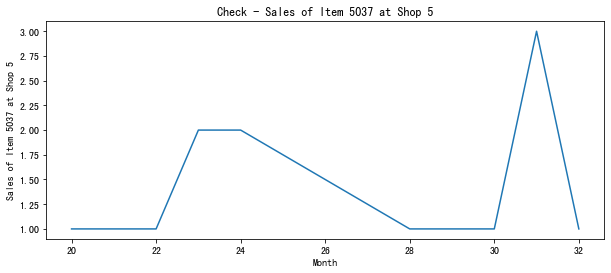

In [9]:
plt.figure(figsize=(10,4))
plt.title('Check - Sales of Item 5037 at Shop 5')
plt.xlabel('Month')
plt.ylabel('Sales of Item 5037 at Shop 5')
plt.plot(check["date_block_num"],check["item_cnt_month"]);

## 部分商品有缺失月份，补全缺失月份

In [10]:
month_list=[i for i in range(num_month+1)]
shop = []
for i in range(num_month+1):
    shop.append(5)
item = []
for i in range(num_month+1):
    item.append(5037)
months_full = pd.DataFrame({'shop_id':shop, 'item_id':item,'date_block_num':month_list})
months_full

,shop_id,item_id,date_block_num
0,5,5037,0
1,5,5037,1
2,5,5037,2
3,5,5037,3
4,5,5037,4
5,5,5037,5
6,5,5037,6
7,5,5037,7
8,5,5037,8
9,5,5037,9


## 将部分月份缺失的数据补全

In [11]:
sales_33month = pd.merge(check, months_full, how='right', on=['shop_id','item_id','date_block_num'])
sales_33month = sales_33month.sort_values(by=['date_block_num'])
sales_33month.fillna(0.00,inplace=True)
sales_33month

,shop_id,item_id,date_block_num,item_cnt_month
9,5,5037,0,0.0
10,5,5037,1,0.0
11,5,5037,2,0.0
12,5,5037,3,0.0
13,5,5037,4,0.0
14,5,5037,5,0.0
15,5,5037,6,0.0
16,5,5037,7,0.0
17,5,5037,8,0.0
18,5,5037,9,0.0


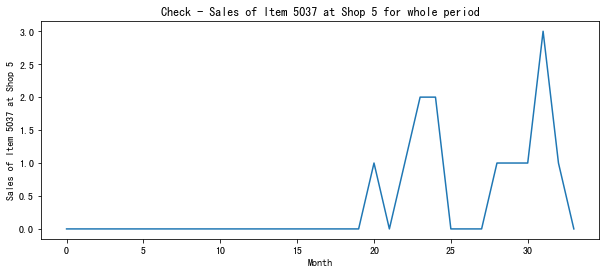

In [12]:
plt.figure(figsize=(10,4))
plt.title('Check - Sales of Item 5037 at Shop 5 for whole period')
plt.xlabel('Month')
plt.ylabel('Sales of Item 5037 at Shop 5')
plt.plot(sales_33month["date_block_num"],sales_33month["item_cnt_month"]);

### 创建一个新特征，本月销售量与上 x 个月销售量的差

In [13]:
for i in range(1,6):
    sales_33month["T_" + str(i)] = sales_33month.item_cnt_month.shift(i)
sales_33month.fillna(0.0, inplace=True)
sales_33month

,shop_id,item_id,date_block_num,item_cnt_month,T_1,T_2,T_3,T_4,T_5
9,5,5037,0,0.0,0.0,0.0,0.0,0.0,0.0
10,5,5037,1,0.0,0.0,0.0,0.0,0.0,0.0
11,5,5037,2,0.0,0.0,0.0,0.0,0.0,0.0
12,5,5037,3,0.0,0.0,0.0,0.0,0.0,0.0
13,5,5037,4,0.0,0.0,0.0,0.0,0.0,0.0
14,5,5037,5,0.0,0.0,0.0,0.0,0.0,0.0
15,5,5037,6,0.0,0.0,0.0,0.0,0.0,0.0
16,5,5037,7,0.0,0.0,0.0,0.0,0.0,0.0
17,5,5037,8,0.0,0.0,0.0,0.0,0.0,0.0
18,5,5037,9,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df = sales_33month[['shop_id','item_id','date_block_num','T_1','T_2','T_3','T_4','T_5', 'item_cnt_month']].reset_index()
df = df.drop(labels = ['index'], axis = 1)
df

,shop_id,item_id,date_block_num,T_1,T_2,T_3,T_4,T_5,item_cnt_month
0,5,5037,0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,5037,1,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5037,2,0.0,0.0,0.0,0.0,0.0,0.0
3,5,5037,3,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5037,4,0.0,0.0,0.0,0.0,0.0,0.0
5,5,5037,5,0.0,0.0,0.0,0.0,0.0,0.0
6,5,5037,6,0.0,0.0,0.0,0.0,0.0,0.0
7,5,5037,7,0.0,0.0,0.0,0.0,0.0,0.0
8,5,5037,8,0.0,0.0,0.0,0.0,0.0,0.0
9,5,5037,9,0.0,0.0,0.0,0.0,0.0,0.0


# 勉强算是交叉验证

In [15]:
train_df = df[:-3]
val_df = df[-3:]
x_train,y_train = train_df.drop(["item_cnt_month"],axis=1) , train_df.item_cnt_month
x_val,y_val = val_df.drop(["item_cnt_month"],axis=1) , val_df.item_cnt_month

In [16]:
x_train

,shop_id,item_id,date_block_num,T_1,T_2,T_3,T_4,T_5
0,5,5037,0,0.0,0.0,0.0,0.0,0.0
1,5,5037,1,0.0,0.0,0.0,0.0,0.0
2,5,5037,2,0.0,0.0,0.0,0.0,0.0
3,5,5037,3,0.0,0.0,0.0,0.0,0.0
4,5,5037,4,0.0,0.0,0.0,0.0,0.0
5,5,5037,5,0.0,0.0,0.0,0.0,0.0
6,5,5037,6,0.0,0.0,0.0,0.0,0.0
7,5,5037,7,0.0,0.0,0.0,0.0,0.0
8,5,5037,8,0.0,0.0,0.0,0.0,0.0
9,5,5037,9,0.0,0.0,0.0,0.0,0.0


In [17]:
y_train

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    1.0
21    0.0
22    1.0
23    2.0
24    2.0
25    0.0
26    0.0
27    0.0
28    1.0
29    1.0
30    1.0
Name: item_cnt_month, dtype: float64

In [18]:
x_val

,shop_id,item_id,date_block_num,T_1,T_2,T_3,T_4,T_5
31,5,5037,31,1.0,1.0,1.0,0.0,0.0
32,5,5037,32,3.0,1.0,1.0,1.0,0.0
33,5,5037,33,1.0,3.0,1.0,1.0,1.0


In [19]:
y_val

31    3.0
32    1.0
33    0.0
Name: item_cnt_month, dtype: float64

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(15, input_shape=(1,8)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [21]:
# Reshape the data between -1 and 1 and to 3D
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_val)

In [22]:
x_train_reshaped = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
x_val_resaped = x_valid_scaled.reshape((x_valid_scaled.shape[0], 1, x_valid_scaled.shape[1]))

In [23]:
x_train_reshaped

array([[[-1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        , -1.        ]],

       [[-1.        , -1.        , -0.93333333, -1.        ,
         -1.        , -1.        , -1.        , -1.        ]],

       [[-1.        , -1.        , -0.86666667, -1.        ,
         -1.        , -1.        , -1.        , -1.        ]],

       [[-1.        , -1.        , -0.8       , -1.        ,
         -1.        , -1.        , -1.        , -1.        ]],

       [[-1.        , -1.        , -0.73333333, -1.        ,
         -1.        , -1.        , -1.        , -1.        ]],

       [[-1.        , -1.        , -0.66666667, -1.        ,
         -1.        , -1.        , -1.        , -1.        ]],

       [[-1.        , -1.        , -0.6       , -1.        ,
         -1.        , -1.        , -1.        , -1.        ]],

       [[-1.        , -1.        , -0.53333333, -1.        ,
         -1.        , -1.        , -1.        , -1.        ]],



In [24]:
x_val_resaped

array([[[-1., -1., -1., -1., -1., -1., -1., -1.]],

       [[-1., -1.,  0.,  1., -1., -1.,  1., -1.]],

       [[-1., -1.,  1., -1.,  1., -1.,  1.,  1.]]])

In [25]:
history = model_lstm.fit(x_train_reshaped, y_train, validation_data=(x_val_resaped, y_val),epochs=70, batch_size=12, verbose=2, shuffle=False)
y_pre = model_lstm.predict(x_val_resaped)

Train on 31 samples, validate on 3 samples
Epoch 1/70
 - 8s - loss: 0.4273 - accuracy: 0.7742 - val_loss: 3.5860 - val_accuracy: 0.3333
Epoch 2/70
 - 0s - loss: 0.4101 - accuracy: 0.7742 - val_loss: 3.5181 - val_accuracy: 0.3333
Epoch 3/70
 - 0s - loss: 0.3955 - accuracy: 0.7742 - val_loss: 3.4539 - val_accuracy: 0.3333
Epoch 4/70
 - 0s - loss: 0.3825 - accuracy: 0.7742 - val_loss: 3.3939 - val_accuracy: 0.3333
Epoch 5/70
 - 0s - loss: 0.3712 - accuracy: 0.7742 - val_loss: 3.3384 - val_accuracy: 0.3333
Epoch 6/70
 - 0s - loss: 0.3613 - accuracy: 0.7742 - val_loss: 3.2877 - val_accuracy: 0.3333
Epoch 7/70
 - 0s - loss: 0.3527 - accuracy: 0.7742 - val_loss: 3.2423 - val_accuracy: 0.3333
Epoch 8/70
 - 0s - loss: 0.3453 - accuracy: 0.7742 - val_loss: 3.2021 - val_accuracy: 0.3333
Epoch 9/70
 - 0s - loss: 0.3387 - accuracy: 0.7742 - val_loss: 3.1672 - val_accuracy: 0.3333
Epoch 10/70
 - 0s - loss: 0.3329 - accuracy: 0.7742 - val_loss: 3.1376 - val_accuracy: 0.3333
Epoch 11/70
 - 0s - loss: 

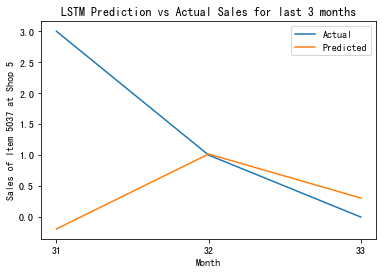

In [26]:
fig, ax = plt.subplots()
ax.plot(x_val['date_block_num'], y_val, label='Actual')
ax.plot(x_val['date_block_num'], y_pre, label='Predicted')
plt.title('LSTM Prediction vs Actual Sales for last 3 months')
plt.xlabel('Month')
plt.xticks(x_val['date_block_num'])
plt.ylabel('Sales of Item 5037 at Shop 5')
ax.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt
rmse = sqrt(mean_squared_error(y_val,y_pre))
print('Val RMSE: %.3f' % rmse)

Val RMSE: 1.851
